<a href="https://colab.research.google.com/github/emanuel379/-Introdu-o-Ci-ncia-de-Dados/blob/main/ICD_Atividade_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from scipy.stats import multivariate_normal
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KernelDensity
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from pandas import DataFrame
from mlxtend.plotting import plot_decision_regions
import sklearn.datasets as skdata

In [ ]:
# 1

from zipfile import ZipFile
file_name = 'data (4).zip'
with ZipFile(file_name, 'r') as zip:

    zip.printdir()


    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

File Name                                             Modified             Size
data/                                          2020-11-16 23:34:20            0
__MACOSX/._data                                2020-11-16 23:34:20          177
data/houses_to_rent.csv                        2020-03-15 01:12:22       471498
__MACOSX/data/._houses_to_rent.csv             2020-03-15 01:12:22          426
data/Advertising.csv                           2019-09-26 05:11:42         4756
__MACOSX/data/._Advertising.csv                2019-09-26 05:11:42          426
data/breastcancer_test.csv                     2018-03-24 16:58:30         4762
__MACOSX/data/._breastcancer_test.csv          2018-03-24 16:58:30          389
data/.DS_Store                                 2020-11-16 23:34:52         6148
__MACOSX/data/._.DS_Store                      2020-11-16 23:34:52          120
data/breastcancer_training.csv                 2018-03-24 16:58:30         7892
__MACOSX/data/._breastcancer_training.cs

In [ ]:
df = pd.read_csv('data/Vehicle.csv')
df

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195,saab
842,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197,van
843,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201,saab
844,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195,saab


In [ ]:
# Medindo a acurácia com knn

data = df.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

# Normalizando os dados

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

p = 0.8
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

k = 5 # numero de vizinhos analizados
# ajusta o modelo k-vizinhos
model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
model.fit(x_train,y_train)
# faz a predição no conjunto de teste
y_pred = model.predict(x_test)

# Calculando a acurácia

score = accuracy_score(y_pred, y_test)
print('Acurácia:', score)

Acurácia: 0.7647058823529411


In [ ]:
# Utilizando regressão logística

data = df.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

p = 0.8 # fração de elementos no conjunto de treinamento
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('Acurácia: ', model.score(x_test, y_test))

Acurácia:  0.7311669128508124


In [ ]:
# Utilizando o classificador Bayesiano paramétrico

data = df.to_numpy()
classes = np.array(pd.unique(y))
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

# Normalizando os dados

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

p = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

print('Dados transformados:')
print('Media: ', np.mean(X, axis = 0))
print('Desvio Padrao:', np.std(X, axis = 0))

Dados transformados:
Media:  [ 5.87919521e-16 -3.14956886e-16 -3.65349988e-16 -1.67977006e-16
  3.77948264e-17 -1.63777581e-16 -3.56951138e-16  1.72176431e-16
  1.67977006e-17  8.27286755e-16 -9.02876408e-17 -1.46979880e-16
  3.73748839e-16 -6.92905150e-16 -5.24928144e-17 -2.93959761e-17
 -1.31022065e-15  1.52649104e-15]
Desvio Padrao: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:

# matrix to store the probabilities
P = pd.DataFrame(data=np.zeros((X_test.shape[0], len(classes))), columns = classes)
Pc = np.zeros(len(classes)) #fraction of elements in each class
for i in np.arange(0, len(classes)):
    elements = np.array(np.where(y_train == classes[i]))
    Pc[i] = elements.shape[1]/len(y_train)
    Z = X_train[elements,:][0].astype(float)
    m = np.mean(Z, axis = 0)
    cv = np.cov(np.transpose(Z))
    for j in np.arange(0,X_test.shape[0]):
        x = X_test[j,:]
        pj = multivariate_normal.pdf(x, mean=m, cov=cv, allow_singular=True)
        P[classes[i]][j] = pj*Pc[i]
print(P)

               van          saab           bus          opel
0     1.239517e-09  1.314806e-13  1.041922e-02  4.695500e-12
1     1.433056e-02  2.747592e-33  1.351752e-23  2.129393e-29
2     3.395744e-07  2.488057e-07  6.541139e-02  9.108235e-07
3     2.428951e-04  2.694367e-03  6.222515e-11  2.354217e-04
4     3.730520e-05  4.126553e-04  5.057323e+00  7.366167e-03
..             ...           ...           ...           ...
165   0.000000e+00  8.834414e-05  1.367700e-19  9.728866e-02
166   0.000000e+00  1.503210e+00  3.579078e-28  8.506062e-04
167  2.167043e-146  2.416477e-01  1.131032e-24  3.852469e-01
168   0.000000e+00  1.622244e+00  4.445241e-31  2.647785e-02
169   3.180798e-04  1.561001e-17  2.843256e-25  1.583271e-18

[170 rows x 4 columns]


In [ ]:
y_pred = []
#np.array(test_x.shape[0], dtype=str)
for i in np.arange(0, X_test.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(classes[c])
y_pred = np.array(y_pred)
y_test = np.array(y_test)
print(y_pred)

['bus' 'van' 'bus' 'saab' 'bus' 'van' 'van' 'saab' 'bus' 'saab' 'saab'
 'bus' 'van' 'opel' 'opel' 'van' 'saab' 'bus' 'saab' 'saab' 'van' 'van'
 'saab' 'saab' 'opel' 'opel' 'opel' 'van' 'van' 'van' 'opel' 'van' 'bus'
 'van' 'van' 'bus' 'bus' 'saab' 'bus' 'opel' 'van' 'bus' 'opel' 'van'
 'saab' 'saab' 'bus' 'van' 'bus' 'van' 'bus' 'bus' 'van' 'saab' 'bus'
 'opel' 'saab' 'opel' 'saab' 'saab' 'bus' 'van' 'saab' 'bus' 'bus' 'bus'
 'saab' 'saab' 'opel' 'opel' 'opel' 'bus' 'saab' 'bus' 'van' 'van' 'saab'
 'opel' 'saab' 'van' 'bus' 'van' 'saab' 'opel' 'opel' 'saab' 'van' 'bus'
 'van' 'saab' 'saab' 'opel' 'bus' 'bus' 'saab' 'bus' 'van' 'van' 'bus'
 'opel' 'saab' 'saab' 'opel' 'van' 'bus' 'bus' 'saab' 'van' 'saab' 'opel'
 'van' 'bus' 'van' 'bus' 'bus' 'van' 'bus' 'opel' 'bus' 'saab' 'bus'
 'opel' 'saab' 'van' 'bus' 'saab' 'bus' 'van' 'bus' 'opel' 'bus' 'van'
 'bus' 'saab' 'bus' 'bus' 'bus' 'saab' 'opel' 'bus' 'van' 'saab' 'bus'
 'bus' 'van' 'opel' 'saab' 'opel' 'van' 'saab' 'opel' 'bus' 'bus' 's

In [ ]:
score = accuracy_score(y_pred, y_test)
print('Acurácia:', score)

Acurácia: 0.8823529411764706


In [ ]:
# Com classificador Bayesiano não-paramétrico

classes = np.array(pd.unique(df[df.columns[-1]]), dtype=str)

# Converte para matriz e vetor do numpy
data = df.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

# Transforma os dados para terem media igual a zero e variancia igual a 1
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Seleciona os conjuntos de treinamento e teste
p = 0.8 # fraction of elements in the training set
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

# Matriz que armazena as probabilidades para cada classe
P = pd.DataFrame(data=np.zeros((x_test.shape[0], len(classes))), columns = classes)
Pc = np.zeros(len(classes)) # Armaze a fracao de elementos em cada classe
h = 2
for i in np.arange(0, len(classes)): # Para cada classe
    elements = tuple(np.where(y_train == classes[i])) # elmentos na classe i
    Pc[i] = len(elements)/len(y_train) # Probabilidade pertencer a classe i
    Z = x_train[elements,:][0].astype(float) # Elementos no conjunto de treinamento
    kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(Z)
    for j in np.arange(0,x_test.shape[0]): # para cada observacao no conjunto de teste
        x = x_test[j,:]
        x = x.reshape((1,len(x)))
        # calcula a probabilidade pertencer a cada classe
        pj = np.exp(kde.score_samples(x))
        P[classes[i]][j] = pj*Pc[i]

y_pred = [] # Vetor com as classes preditas
for i in np.arange(0, x_test.shape[0]):
    c = np.argmax(np.array(P.iloc[[i]]))
    y_pred.append(classes[c])
y_pred = np.array(y_pred, dtype=str)
# calcula a acuracia
score = accuracy_score(y_pred, y_test)
print('Acurácia:', score)

Acurácia: 0.6764705882352942


In [ ]:
# Para Naive Bays

data = df.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

p = 0.8 # fração de elementos no conjunto de treinamento
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('Acurácia: ', model.score(x_test, y_test))

Acurácia:  0.4121122599704579


Logo, o classificador Bayesiano paramétrico é o melhor para o arquivo analizado anteriormente.

Hiperparâmetro h que possui maior acurácia: 0.2


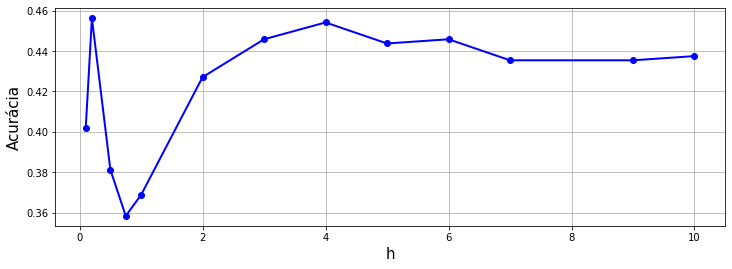

In [ ]:
# 2

data = pd.read_csv('data/winequality-red.csv', header=(0))
#display(data)

df = pd.DataFrame(data)

classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)
# Converte para matriz e vetor do numpy
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

# Transforma os dados para terem media igual a zero e variancia igual a 1
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Seleciona os conjuntos de treinamento e teste
p = 0.7 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

####  Realiza a classificacao ####

vacc = []
vh = [0.1, 0.2, 0.5, 0.75, 1, 2,3,4, 5,6,7,9, 10]
plt.figure(figsize=(12,4))
for h in vh:
    # Matriz que armazena as probabilidades para cada classe
    P = pd.DataFrame(data=np.zeros((x_train.shape[0], len(classes))), columns = classes)
    Pc = np.zeros(len(classes)) # Armaze a fracao de elementos em cada classe
    for i in np.arange(0, len(classes)): # Para cada classe
        elements = tuple(np.where(y_train == int(classes[i]))) # elmentos na classe i
        Pc[i] = len(elements)/len(y_train) # Probabilidade pertencer a classe i
        Z = x_train[elements,:][0].astype(int) # Elementos no conjunto de treinamento
        kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(Z)
        for j in np.arange(0,x_test.shape[0]): # para cada observacao no conjunto de teste
            x = x_test[j,:]
            x = x.reshape((1,len(x)))
            # calcula a probabilidade pertencer a cada classe
            pj = np.exp(kde.score_samples(x))
            P[classes[i]][j] = pj*Pc[i]

    y_pred = [] # Vetor com as classes preditas
    for i in np.arange(0, x_test.shape[0]):
        c = np.argmax(np.array(P.iloc[[i]]))
        y_pred.append(classes[c])
    y_pred = np.array(y_pred, dtype=int)
    # calcula a acuracia
    score = accuracy_score(y_pred, y_test)
    vacc.append(score)
    #print('Acuracia:', score)

im  = vacc.index(max(vacc))
print(f'Hiperparâmetro h que possui maior acurácia: {vh[im]}')

plt.plot(vh,vacc, 'o-', color = 'blue', linewidth=2)
plt.xlabel('h', fontsize = 15)
plt.ylabel('Acurácia', fontsize = 15)
plt.grid(True)
plt.show(True)

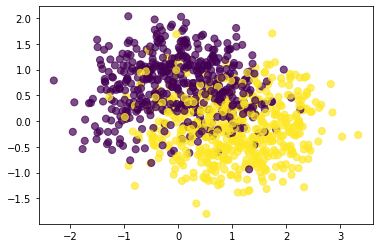

In [ ]:
# 3

plt.figure(figsize=(6,4))
n_samples = 1000
data = datasets.make_moons(n_samples=n_samples, noise=.5)
X = data[0]
y = data[1]
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.show(True)

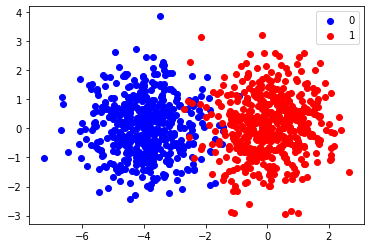

/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


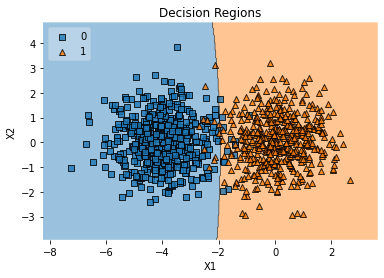

In [ ]:
# Classificando os dados com Naive Bays

# centro dos grupos
centers = [(-4, 0), (0, 0)]
X, y = skdata.make_blobs(n_samples=1000, n_features=2, cluster_std=1.0, centers=centers,
                         shuffle=False, random_state=42)

# monta a matrix de atributos
d = np.column_stack((X,np.transpose(y)))
# converte para o formato dataframe do Pandas
data = DataFrame(data = d, columns=['X1', 'X2', 'y'])
features_names = ['X1', 'X2']
class_labels = np.unique(y)

# mostra os dados e colori de acordo com as classes
colors = ['blue', 'red', 'black']
aux = 0
for c in class_labels:
    ind = np.where(y == c)
    plt.scatter(X[ind,0][0], X[ind,1][0], color = colors[aux], label = c)
    aux = aux + 1
plt.legend()
plt.show()

# Training a classifier
model = GaussianNB()
model.fit(X, y)

# Plotting decision regions
plot_decision_regions(X, y, clf=model, legend=2)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Regions')
plt.show()